In [332]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

In [333]:
df_desc = pd.read_csv("data/key.csv", index_col = 0)
df = pd.read_csv("data/data_clean.csv")
df = df.drop("Unnamed: 0",axis=1)

In [334]:
df.dtypes

funder                     object
gps_height                  int64
installer                  object
wpt_name                   object
basin                      object
region_code                 int64
district_code               int64
population                  int64
public_meeting            float64
permit                    float64
extraction_type_class      object
management                 object
payment_type               object
quality_group              object
quantity                   object
source                     object
source_class               object
waterpoint_type            object
status_group               object
construction_year_bins     object
dtype: object

In [335]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,other,1390,other,none,Lake Nyasa,11,5,109,1.0,0.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
1,other,1399,other,Zahanati,Lake Victoria,20,2,280,NaN,1.0,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000.0, 2010.0]"
2,other,686,other,other,Pangani,21,4,250,1.0,1.0,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000.0, 2010.0]"
3,other,263,other,other,Ruvuma / Southern Coast,90,63,58,1.0,1.0,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980.0, 1990.0]"
4,other,0,other,Shuleni,Lake Victoria,18,1,0,1.0,1.0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980.0, 1990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,other,1210,other,other,Pangani,3,5,125,1.0,1.0,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
59396,other,1212,other,other,Rufiji,11,4,56,1.0,1.0,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990.0, 2000.0]"
59397,other,0,other,other,Rufiji,12,7,0,1.0,0.0,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980.0, 1990.0]"
59398,other,0,other,other,Rufiji,1,4,0,1.0,1.0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980.0, 1990.0]"


In [336]:
def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    df["public_meeting"] = df["public_meeting"].astype(str)
    df["permit"] = df["permit"].astype(str)
    df["construction_year_bins"] = df["construction_year_bins"].astype(str)
    return df.dtypes

In [337]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,other,1390,other,none,Lake Nyasa,11,5,109,1.0,0.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
1,other,1399,other,Zahanati,Lake Victoria,20,2,280,NaN,1.0,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000.0, 2010.0]"
2,other,686,other,other,Pangani,21,4,250,1.0,1.0,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000.0, 2010.0]"
3,other,263,other,other,Ruvuma / Southern Coast,90,63,58,1.0,1.0,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980.0, 1990.0]"
4,other,0,other,Shuleni,Lake Victoria,18,1,0,1.0,1.0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980.0, 1990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,other,1210,other,other,Pangani,3,5,125,1.0,1.0,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
59396,other,1212,other,other,Rufiji,11,4,56,1.0,1.0,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990.0, 2000.0]"
59397,other,0,other,other,Rufiji,12,7,0,1.0,0.0,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980.0, 1990.0]"
59398,other,0,other,other,Rufiji,1,4,0,1.0,1.0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980.0, 1990.0]"


In [338]:
int_to_object(df)

funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
region_code               object
district_code             object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
management                object
payment_type              object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
construction_year_bins    object
dtype: object

In [339]:
X = df.drop(["status_group"], axis=1)
y = df['status_group']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=465615615)

In [341]:
X_train.dtypes

funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
region_code               object
district_code             object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
management                object
payment_type              object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
construction_year_bins    object
dtype: object

In [342]:
X_train["waterpoint_type"].value_counts()

communal standpipe             21389
hand pump                      13085
other                           4822
communal standpipe multiple     4585
improved spring                  575
cattle trough                     90
dam                                4
Name: waterpoint_type, dtype: int64

In [343]:
X_train["wpt_name"].value_counts()

other        39316
none          2675
Shuleni       1319
Zahanati       617
Msikitini      390
Kanisani       233
Name: wpt_name, dtype: int64

In [344]:
def grab_numeric(df):
    return df.select_dtypes(include=['int64'])

In [345]:
GrabNumeric = FunctionTransformer(grab_numeric)

In [346]:
GrabNumeric

FunctionTransformer(func=<function grab_numeric at 0x00000180ABBD81F0>)

In [347]:
pipe= Pipeline(steps=[("num", GrabNumeric),
                      ( "ss", StandardScaler())])

In [348]:
pipe.fit(X_train)


Pipeline(steps=[('num',
                 FunctionTransformer(func=<function grab_numeric at 0x00000180ABBD81F0>)),
                ('ss', StandardScaler())])

In [349]:
pipe.transform(X_train)

array([[-0.84040878,  0.25062257],
       [-0.96708423, -0.38007373],
       [ 0.55590018,  0.29266899],
       ...,
       [-0.96708423, -0.38007373],
       [ 0.77614273, -0.37797141],
       [-0.96708423, -0.38007373]])

In [350]:
j = -1
for i in X_train.columns:
    j+=1
    print("Index Number", j,i)

Index Number 0 funder
Index Number 1 gps_height
Index Number 2 installer
Index Number 3 wpt_name
Index Number 4 basin
Index Number 5 region_code
Index Number 6 district_code
Index Number 7 population
Index Number 8 public_meeting
Index Number 9 permit
Index Number 10 extraction_type_class
Index Number 11 management
Index Number 12 payment_type
Index Number 13 quality_group
Index Number 14 quantity
Index Number 15 source
Index Number 16 source_class
Index Number 17 waterpoint_type
Index Number 18 construction_year_bins


In [351]:
# We'll throw these mini-pipelines into our ColumnTransformer.

subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer(strategy="median")),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [352]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [1,7]),
                                         ('subpipe_cat', subpipe_cat, [0,2,3,4,5,6,8,9,11,12,13,14,15,16,17,18])])

In [353]:
logreg_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("logreg", LogisticRegression(random_state=465654))]))

In [354]:
logreg_model_pipe.fit(X_train, y_train)

C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [355]:
logreg_model_pipe.score(X_train, y_train)

0.7407856341189675

In [356]:
rfc = RandomForestClassifier(random_state=165156156, n_jobs=-1)
rfc_model_pipe = Pipeline([("ct", CT), ("rfc", rfc)])

In [357]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [358]:
rfc_model_pipe.score(X_train, y_train)

0.9449382716049383

In [359]:
rfc_2 = RandomForestClassifier(random_state=42, max_depth=11, n_jobs=-1)
rfc_2_pipe= Pipeline([("ct", CT), ('rfc_2', rfc_2)])

In [360]:
rfc_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [361]:
rfc_2_pipe.score(X_train, y_train)

0.7611896745230079

In [362]:
y_hat = rfc_2_pipe.predict(X_test)

In [363]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.75. 

Our final model's recall on the test set is 0.53 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.54.



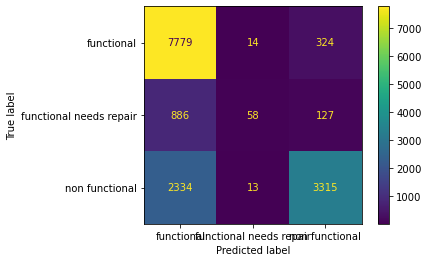

In [364]:
plot_confusion_matrix(rfc_2_pipe, X_test, y_test);

In [365]:
gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

In [366]:
rfc_2 = RandomForestClassifier(random_state=42, max_depth=11, n_jobs=-1)

In [367]:
gbc_model_pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gbc_model_pipe.score(X_train, y_train)

0.7593939393939394

In [ ]:
y_hat = gbc_model_pipe.predict(X_test)